In [1]:
from itertools import product
import numpy as np
import pandas as pd
from ADRprofilePrediction import Pairs2Mat, evaluation
from Models import loadHyperpar
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as path_effects

In [2]:
import sklearn
print(sklearn.__version__)

0.24.2


In [3]:
# drug_target_mat = Pairs2Mat(path="data/drug_target.tsv",colname1="0",colname2="1")
# drug_enzyme_mat = Pairs2Mat(path="data/drug_enzyme.tsv",colname1="0",colname2="1")
# drug_Chem_mat = pd.read_csv("data/drug_chemsfp.tsv",sep = "\t",header=0,index_col=0)
# DGI_mat = Pairs2Mat(path="data/interactions.tsv",colname1="drug_claim_name",colname2="gene_name")
# # DGI_mat2 = pd.read_csv("data/intersection_DGIdb_mat.tsv",sep = "\t",header=0,index_col=0)
# drug_transporter_mat = Pairs2Mat(path="data/drug_transporter.tsv",colname1="0",colname2="1")
# drug_pathway_mat = Pairs2Mat(path="data/drug_pathway.tsv",colname1="0",colname2="1")
# drug_indication_mat = Pairs2Mat(path="data/drug_indication.tsv",colname1="1_x",colname2="6")

# SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
# # drug_sideeffect_mat = Pairs2Mat(path="data/side-effect-and-drug_name_upper.tsv",colname1="drugbank_name",colname2="side_effect_name")
# OFFSIDES = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")

In [4]:
features_dict = {
    "target":Pairs2Mat(path="data/drug_target.tsv",colname1="0",colname2="1"),
    "enzyme":Pairs2Mat(path="data/drug_enzyme.tsv",colname1="0",colname2="1"),
    "Chem":pd.read_csv("data/drug_chemsfp.tsv",sep = "\t",header=0,index_col=0),
    "DGI":Pairs2Mat(path="data/interactions.tsv",colname1="drug_claim_name",colname2="gene_name"),
    "transporter":Pairs2Mat(path="data/drug_transporter.tsv",colname1="0",colname2="1"),
    "pathway":Pairs2Mat(path="data/drug_pathway.tsv",colname1="0",colname2="1"),
    "indication":Pairs2Mat(path="data/drug_indication.tsv",colname1="1_x",colname2="6")
}


In [5]:
features_names = ["target", "enzyme", "Chem", "DGI", "transporter", "pathway", "indication"]
SE_names = ["SIDER", "OFFSIDES"]
methods = ["SKR", "KR", "KRR", "Naive", "LNSM_RLN", "LNSM_jaccard", "VKR"]
# methods = ["SKR", "KR", "KRR", "Naive", "LNSM_RLN", "LNSM_jaccard", "VKR", "SVM", "OCCA", "SCCA", "RF", "BRF"]
tuning_metrices=["AUROC", "AUPR", "AUROCperdrug", "AUPRperdrug"]
# metrice_names = ["AUROC", "AUPR", "F1", "AUROCperdrug", "AUPRperdrug", "F1perdrug", "adjF1"]

In [6]:
# SEs = {}
# SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
# column_sums = np.sum(SIDER, axis=0)
# SEs["SIDER"] = SIDER.loc[:, column_sums >= 5]
SEs = {}
SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
column_sums = np.sum(SIDER, axis=0)
SEs["SIDER"] = SIDER.loc[:, (column_sums >= 50)]

# OFFSIDERS = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")
# column_sums = np.sum(OFFSIDERS, axis=0)
# SEs["OFFSIDES"] = OFFSIDERS.loc[:, column_sums >= 5]

# SEs = {}
# SEs["SIDER"] = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
# SEs["OFFSIDES"] = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")

In [7]:
SEs = {}
SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
column_sums = np.sum(SIDER, axis=0)


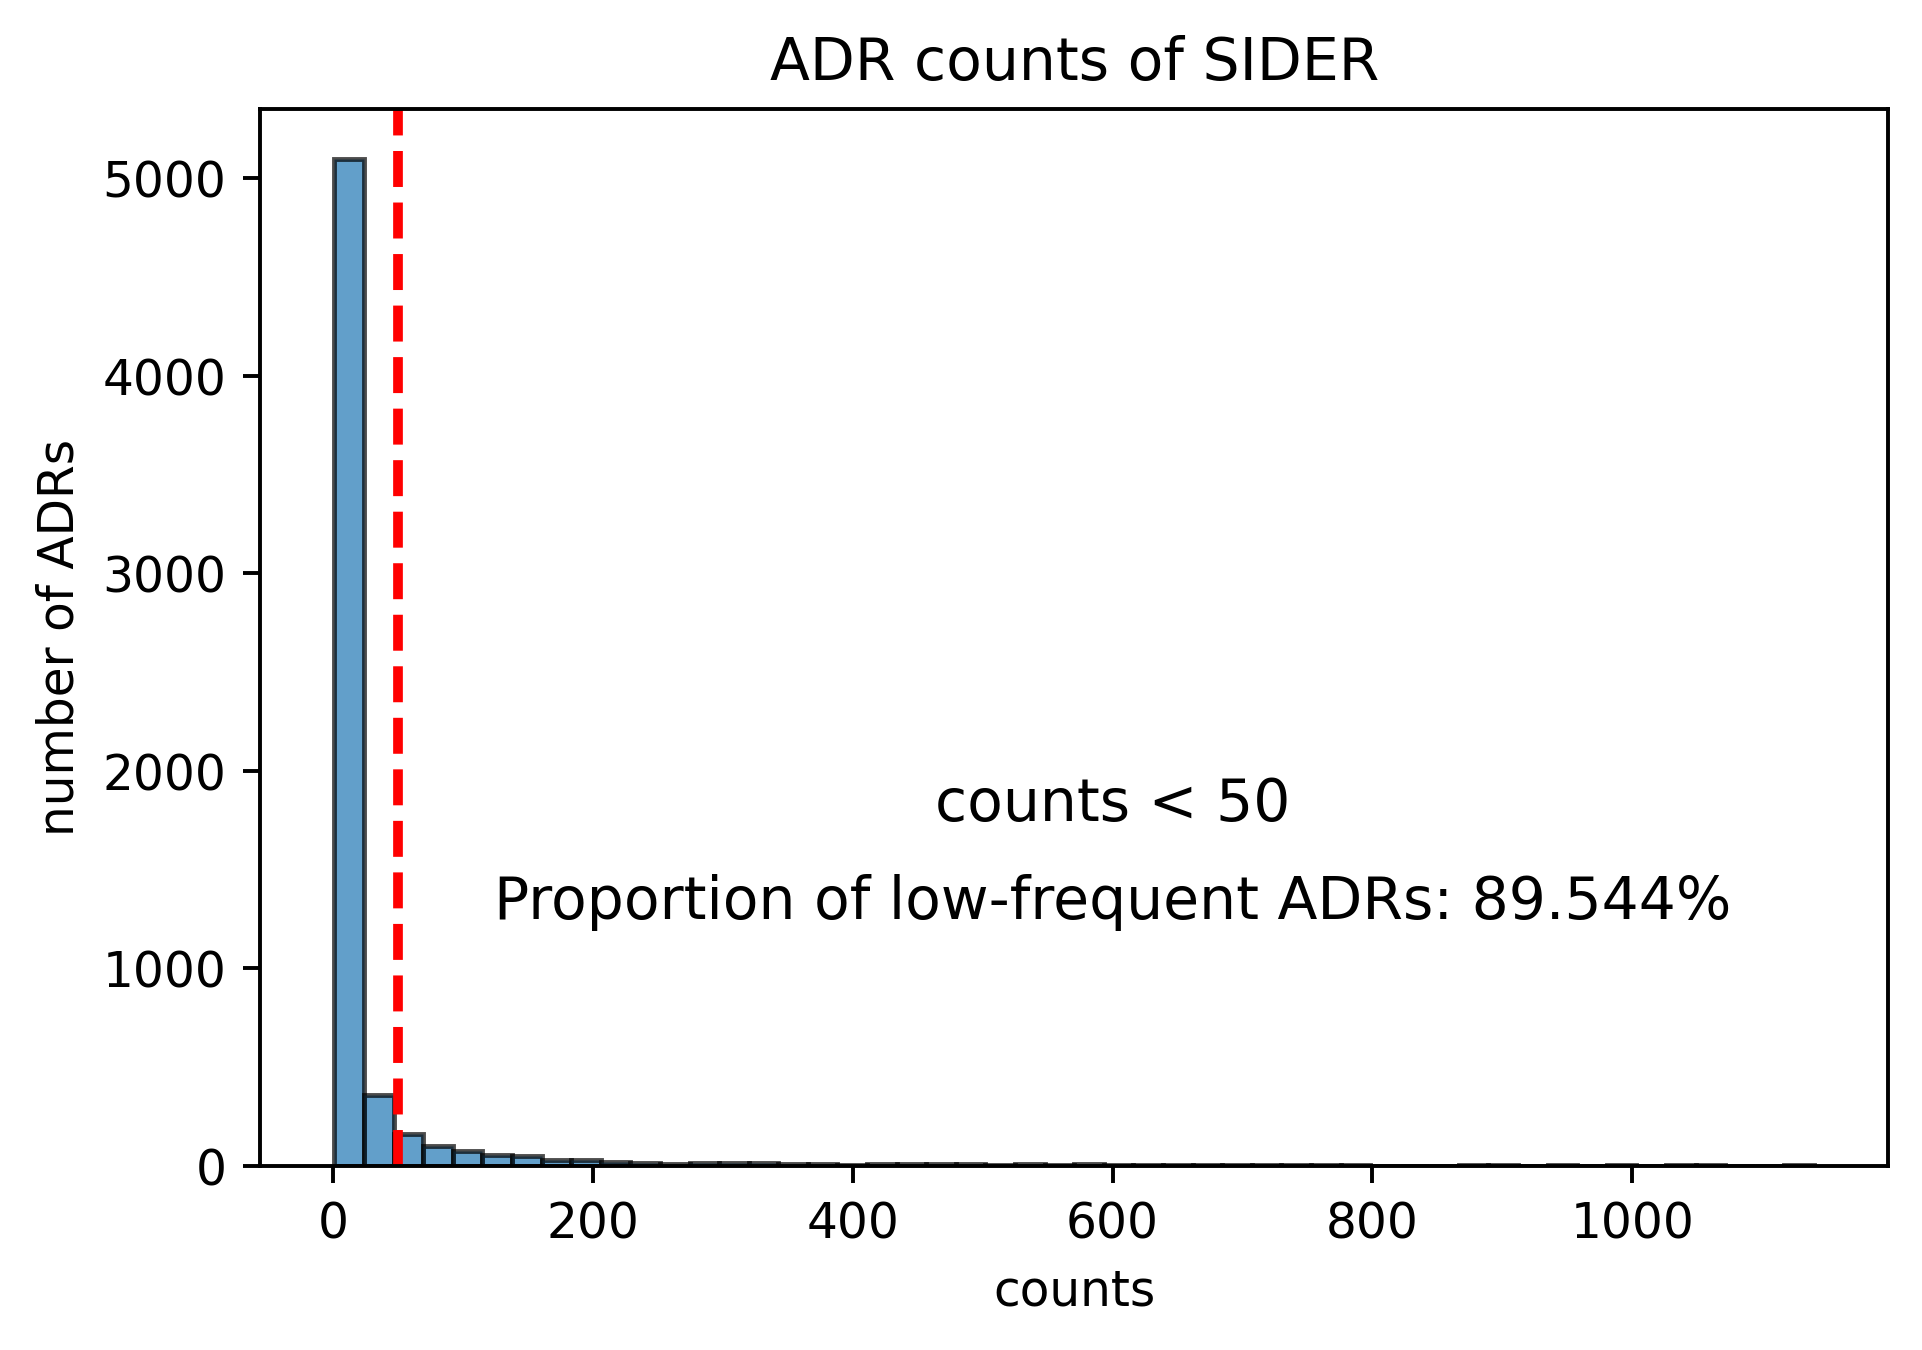

In [8]:
column_sums
plt.figure(dpi=350)
plt.hist(column_sums, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.title('ADR counts of SIDER')
plt.xlabel('counts')
plt.ylabel('number of ADRs')
prop = ((column_sums < 50).sum()/len(column_sums)).round(5)*100
plt.text(600, 1250, f'Proportion of low-frequent ADRs: {prop}%', color='black', fontsize=12, ha='center')
plt.text(600, 1750, "counts < 50", color='black', fontsize=12, ha='center')
plt.savefig(fname=f"figs/SIDER_rare.jpg", bbox_inches="tight")
plt.show()

In [9]:
OFFSIDERS = Pairs2Mat(path="data/OFFSIDES.csv",colname1="drug_concept_name",colname2="condition_concept_name",sep = ",")
column_sums = np.sum(OFFSIDERS, axis=0)
SEs["OFFSIDES"] = OFFSIDERS.loc[:, column_sums >= 5]

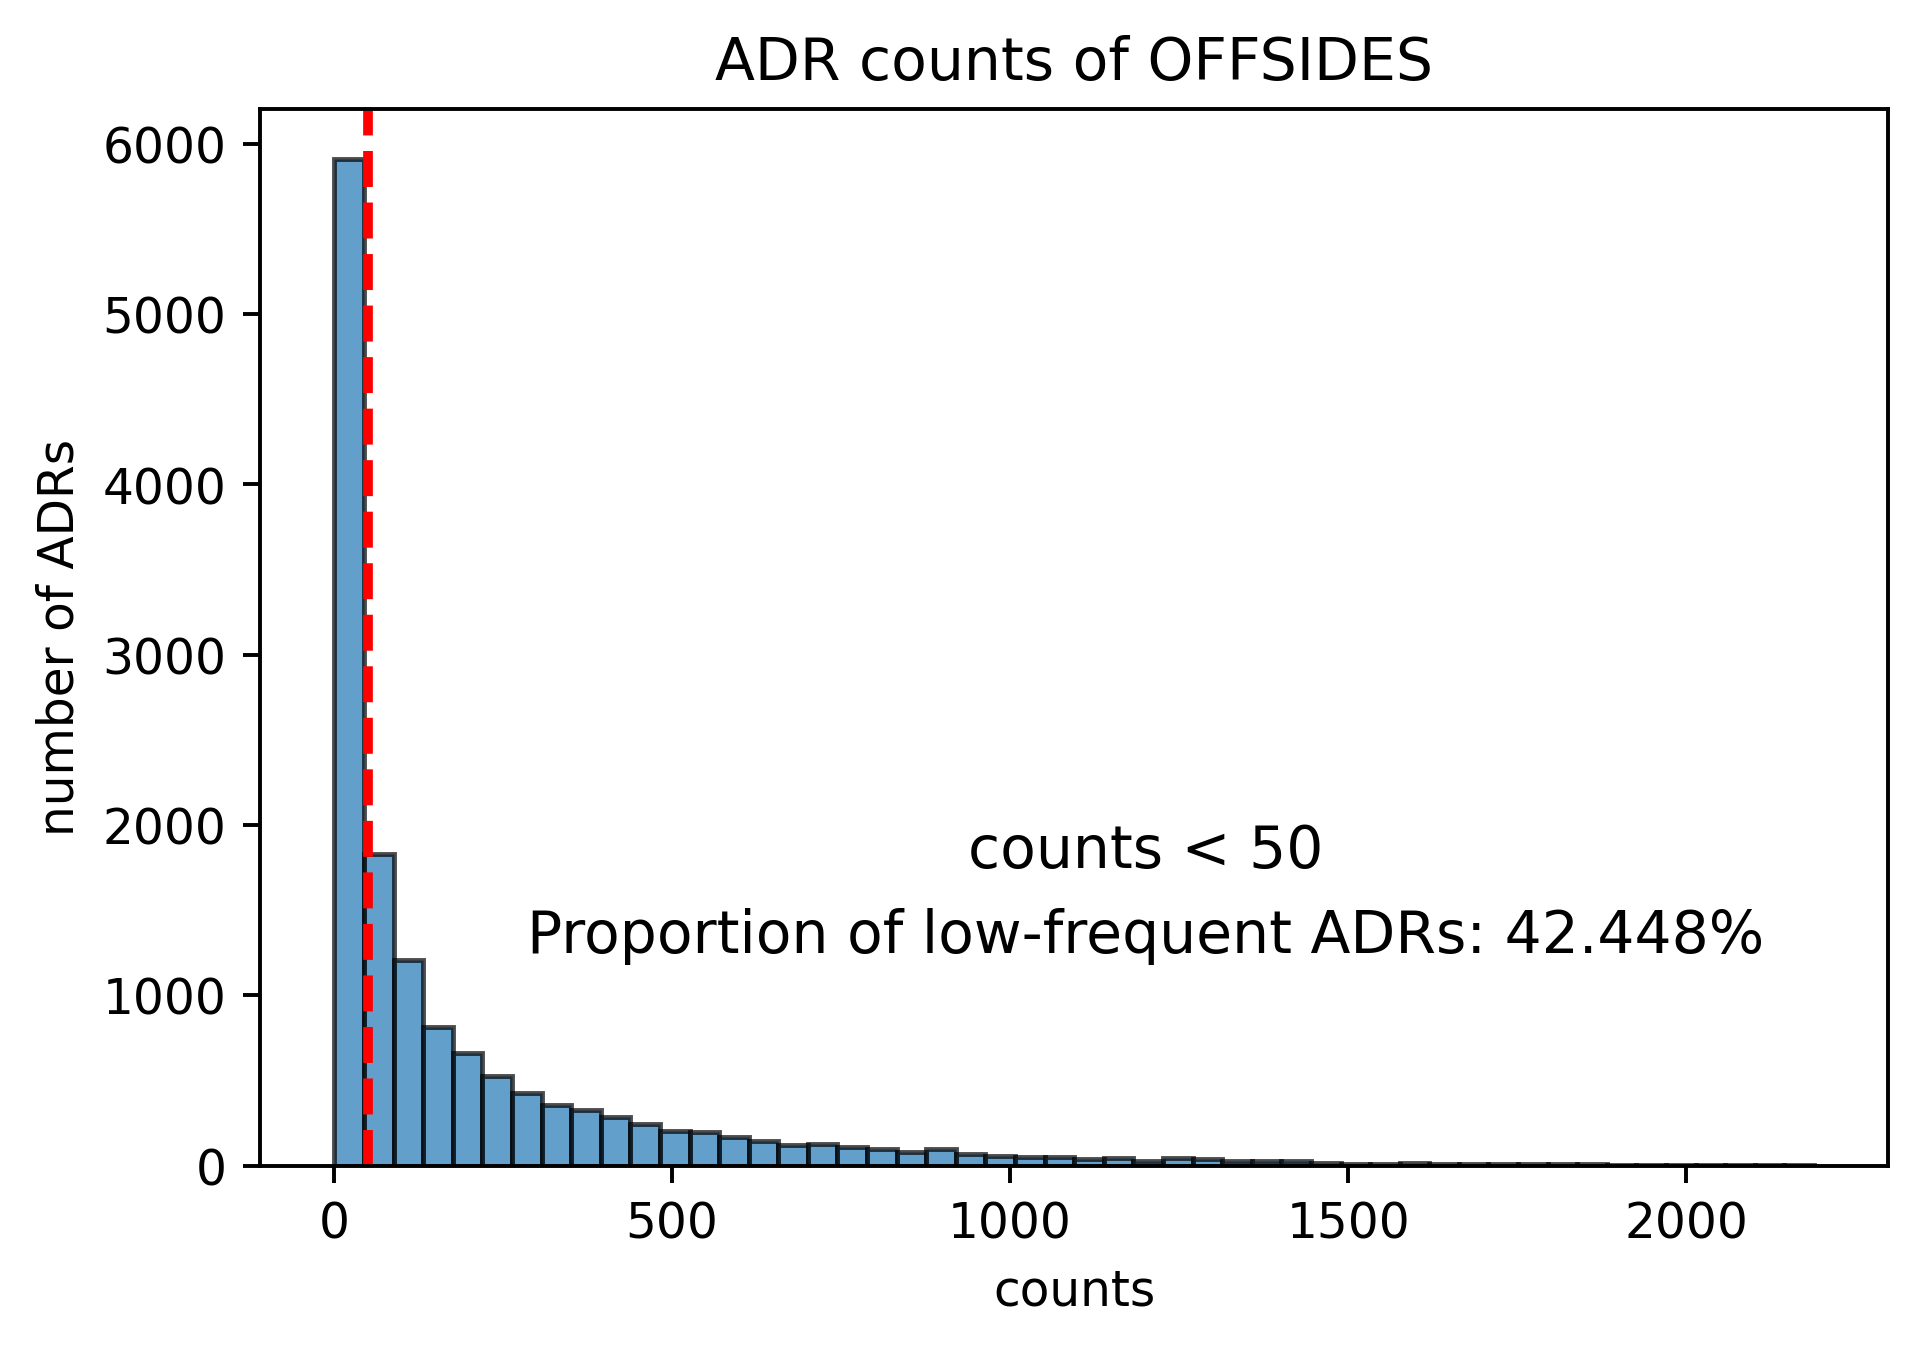

In [12]:
column_sums
plt.figure(dpi=350)
plt.hist(column_sums, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.title('ADR counts of OFFSIDES')
plt.xlabel('counts')
plt.ylabel('number of ADRs')
prop = ((column_sums < 50).sum()/len(column_sums)).round(5)*100
plt.text(1200, 1250, f'Proportion of low-frequent ADRs: {prop}%', color='black', fontsize=12, ha='center')
plt.text(1200, 1750, "counts < 50", color='black', fontsize=12, ha='center')

plt.savefig(fname=f"figs/OFFSIDES_rare.jpg", bbox_inches="tight")
plt.show()

In [20]:
A = 10**np.arange(-2, 3, 1, dtype=float)
B = np.arange(0, 1, 0.1, dtype=float)
C = np.arange(5, 20, 5, dtype=int)
D = np.arange(1, 2, 1, dtype=float)
all_hyperparlist = {
    "SKR":[A,B,A,A], 
    "KR":[A,A], 
    "KRR":[A,A],
    "Naive":[], 
    "LNSM_RLN":[B], 
    "LNSM_jaccard":[B], 
    "VKR":[A,A,C], 
    "SVM":[A,A,A], 
    "OCCA":[], 
    "SCCA":[A], 
    "RF":[C], 
    "BRF":[C]
}

In [21]:
metrice = "AUPR"

In [22]:
hyperpars = {}
hyperpars["nested_cv"] = {}
hyperpars["cv"] = {}
hyperparsOut = {}
hyperparsOut["nested_cv"] = {}
hyperparsOut["cv"] = {}
results = {}

In [50]:
hyperpars["nested_cv"]["KRR"] = {}
hyperpars["nested_cv"]["KRR"]["target"] = [
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["enzyme"] = [
    (1, 10),
    (10, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["Chem"] = [
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["DGI"] = [
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["transporter"] = [
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    (1, 10),
    ]
hyperpars["nested_cv"]["KRR"]["pathway"] = [
    (0.01, 10),
    (0.01, 10),
    (0.01, 10),
    (0.01, 10),
    (0.01, 10),
    ]
hyperpars["nested_cv"]["KRR"]["indication"] = [
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    (0.1, 10),
    ]

In [51]:
SEs = {}
SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
column_sums = np.sum(SIDER, axis=0)
results["KRR"] = {}
results["Naive"] = {}
for i in range(0, 300, 5):
    results["KRR"][i] = {}
    results["Naive"][i] = {}
    SEs["SIDER"] = SIDER.loc[:, (column_sums >= i)]
    
    validation = "nested_cv"
    method = "KRR"
    str = "DGI"
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[method][i], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation, n_jobs=1)

    method = "Naive"
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[method][i], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,Validation=validation,n_jobs=1)

using feature DGI
The KRR requires hyperparameter lambda, sigma_X
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  25
first few training idx:  [ 49  54  67 117 183 251 258 271 411 712]
first few testing idx:  [ 94 124 142 193 241 339 379 438 651 689]
--- tuning end ---
target size: 150
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.4403870302633993
AUROCperdrug: 0.9100148691206565
AUPR+AUROCperdrug: 1.3504018993840559
AUPR: 0.400166789881065
AUROC: 0.895499274556988
AUPR+AUROC: 1.2956660644380529
-----------
Fold: 1
number of hyperpars combination:  25
first few training idx:  [ 94 124 142 193 241 339 379 438 651 689]
first few testing idx:  [ 49  54  67 117 183 251 258 271 411 712]
--- tuning end ---
target size: 150
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.44501046206194855
AUROCperdrug: 0.9150826598561888
AUPR+AUROCperdrug: 1.3600931219181374
AUPR: 0.388533111

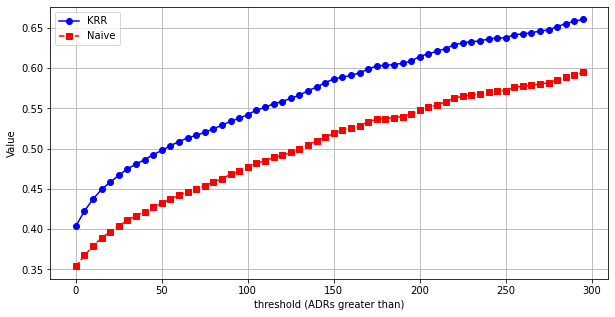

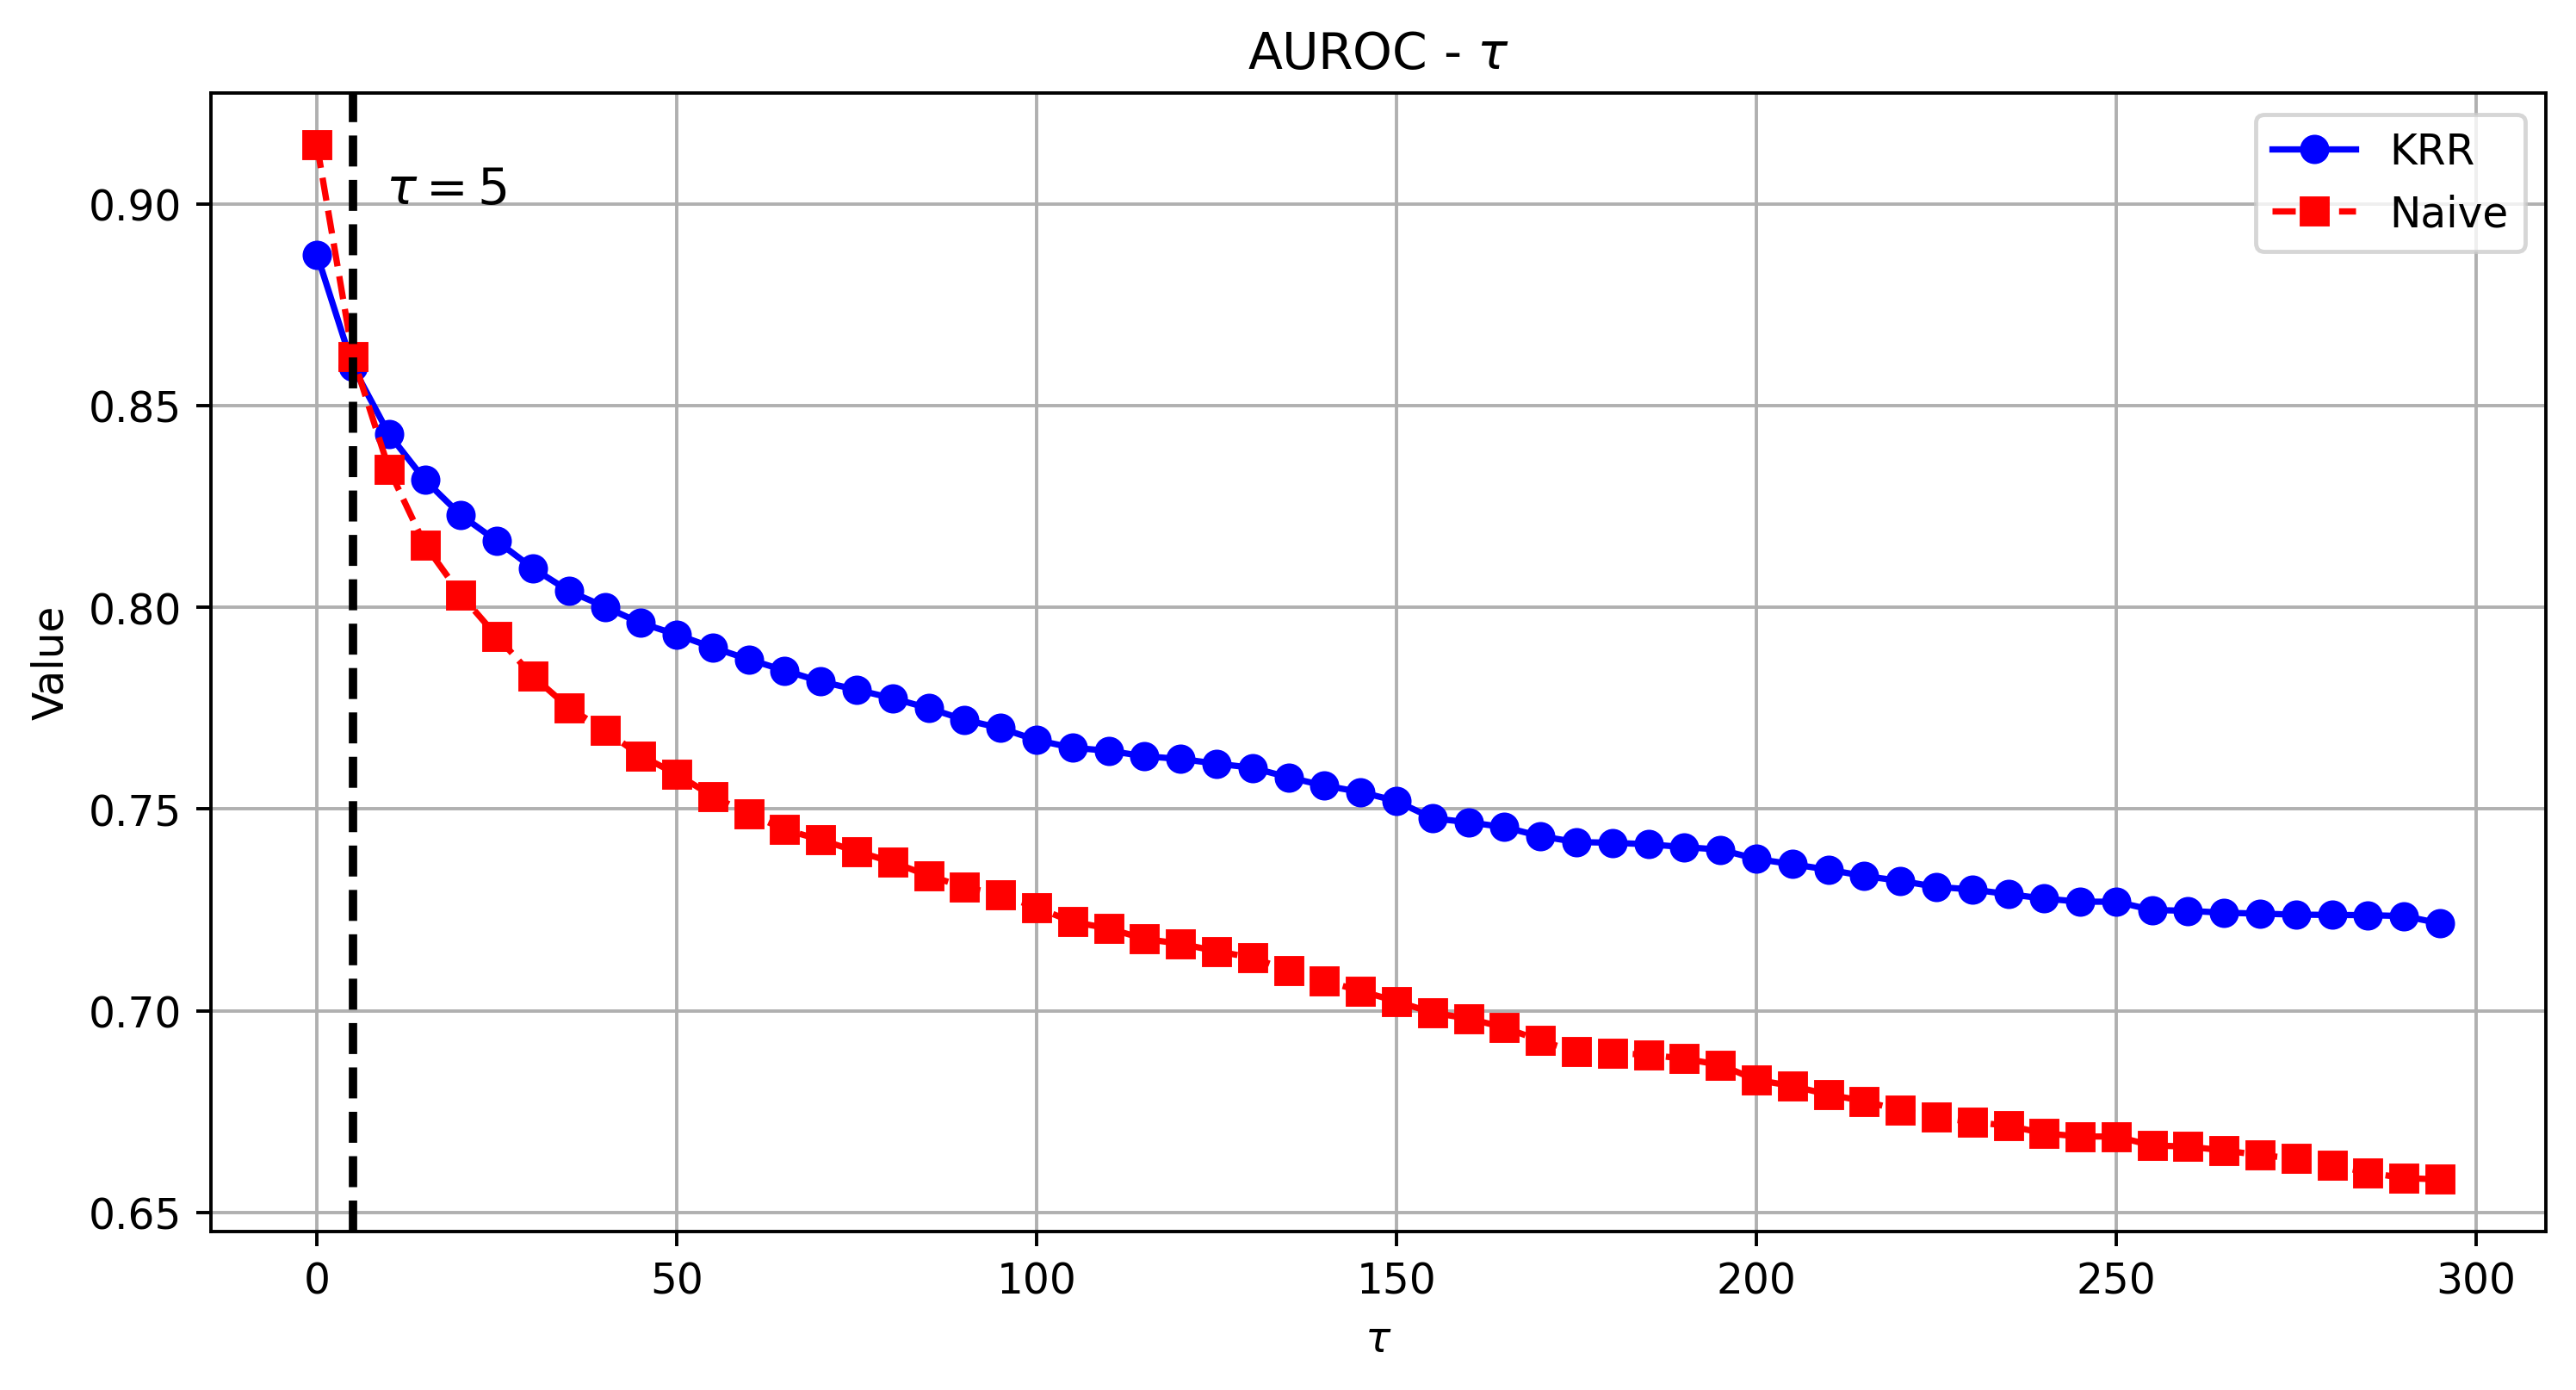

In [74]:

vector1 = []
metrice = "AUPR"
for i in range(0, 300, 5):
    vector1.append(np.array(results["KRR"][i][metrice]).mean())
    vector2 = []
x = []
for i in range(0, 300, 5):
    vector2.append(np.array(results["Naive"][i][metrice]).mean())
    x.append(i)
plt.figure(figsize=(10, 5))

# Plot the first series
plt.plot(x, vector1, marker='o', linestyle='-', color='b', label='KRR')

# Plot the second series
plt.plot(x, vector2, marker='s', linestyle='--', color='r', label='Naive')

# Add titles and labels
# plt.title(f"{metrice}", " - $\{tau}$")
plt.xlabel('threshold (ADRs greater than)')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the chart
plt.show()

vector1 = []
metrice = "AUROC"
for i in range(0, 300, 5):
    vector1.append(np.array(results["KRR"][i][metrice]).mean())
    vector2 = []
x = []
for i in range(0, 300, 5):
    vector2.append(np.array(results["Naive"][i][metrice]).mean())
    x.append(i)
plt.figure(figsize=(10, 5), dpi=350)

# Plot the first series
plt.plot(x, vector1, marker='o', linestyle='-', color='b', label='KRR')

# Plot the second series
plt.plot(x, vector2, marker='s', linestyle='--', color='r', label='Naive')
plt.axvline(x=5, color='black', linestyle='--', linewidth=2)
# Add titles and labels
plt.title(f"{metrice} - "+"$\\tau$")
plt.xlabel('$\\tau$')
plt.ylabel('Value')
plt.text(18, 0.9, "$\\tau=5$", color='black', fontsize=12, ha='center')
# Add legend
plt.legend()

# Show grid
plt.grid(True)
plt.savefig(fname=f"figs/define_tau.jpg", bbox_inches="tight")
# Display the chart
plt.show()

In [26]:
SEs = {}
SIDER = Pairs2Mat(path="data/drug_se.tsv",colname1="1_x",colname2="5")
column_sums = np.sum(SIDER, axis=0)
results["KRR"] = {}
results["Naive"] = {}
for i in range(5, 305, 25):
    results["KRR"][i] = {}
    results["Naive"][i] = {}
    SEs["SIDER"] = SIDER.loc[:, (column_sums < i)]
    
    validation = "nested_cv"
    method = "KRR"
    str = "DGI"
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[method][i], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,hyperparfixed=hyperpars[validation][method][str],Validation=validation, n_jobs=1)

    method = "Naive"
    print(f"using feature {str}")
    hyperparList = loadHyperpar(*all_hyperparlist[method],method_option=method)
    results[method][i], _ = evaluation(Y=SEs["SIDER"], X=features_dict[str], method_option=method,tuning_metrice=metrice,hyperparList=hyperparList,Validation=validation,n_jobs=1)

using feature DGI
The KRR requires hyperparameter lambda, sigma_X
---------- nested cv start ----------
Fold: 0
number of hyperpars combination:  25
first few training idx:  [ 91  96 164 184 261 315 379 433 470 498]
first few testing idx:  [ 78 117 140 292 343 381 401 542 553 565]
--- tuning end ---
target size: 113
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.03250106567304588
AUROCperdrug: 0.5647942617266507
AUPR+AUROCperdrug: 0.5972953273996966
AUPR: 0.005219135204051869
AUROC: 0.5229937610375358
AUPR+AUROC: 0.5282128962415876
-----------
Fold: 1
number of hyperpars combination:  25
first few training idx:  [ 78 117 140 292 343 381 401 542 553 565]
first few testing idx:  [ 91  96 164 184 261 315 379 433 470 498]
--- tuning end ---
target size: 113
------ best hyper pars:  (0.1, 10) ------
KRR starts:
KRR ends:
-----------
AUPRperdrug: 0.043965607817668194
AUROCperdrug: 0.5530996226141979
AUPR+AUROCperdrug: 0.5970652304318661
AUPR: 0.004

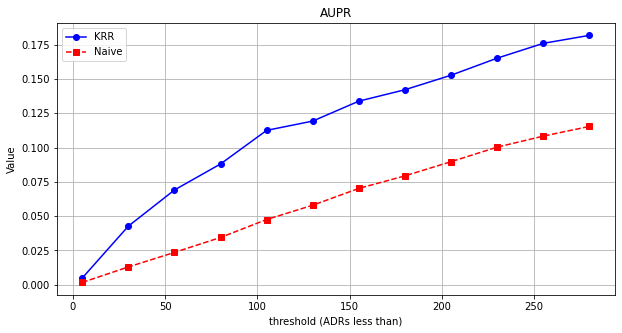

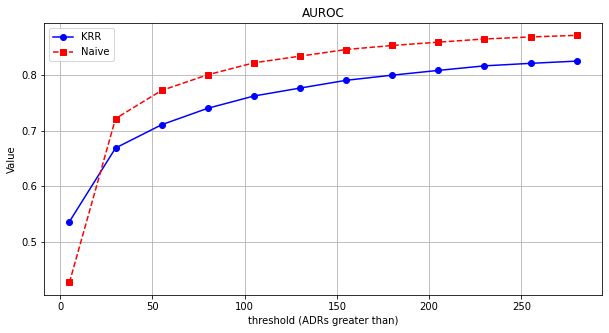

In [27]:

vector1 = []
metrice = "AUPR"
for i in range(5, 305, 25):
    vector1.append(np.array(results["KRR"][i][metrice]).mean())
    vector2 = []
x = []
for i in range(5, 305, 25):
    vector2.append(np.array(results["Naive"][i][metrice]).mean())
    x.append(i)
plt.figure(figsize=(10, 5))

# Plot the first series
plt.plot(x, vector1, marker='o', linestyle='-', color='b', label='KRR')

# Plot the second series
plt.plot(x, vector2, marker='s', linestyle='--', color='r', label='Naive')

# Add titles and labels
plt.title(metrice)
plt.xlabel('threshold (ADRs less than)')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the chart
plt.show()

vector1 = []
metrice = "AUROC"
for i in range(5, 305, 25):
    vector1.append(np.array(results["KRR"][i][metrice]).mean())
    vector2 = []
x = []
for i in range(5, 305, 25):
    vector2.append(np.array(results["Naive"][i][metrice]).mean())
    x.append(i)
plt.figure(figsize=(10, 5))

# Plot the first series
plt.plot(x, vector1, marker='o', linestyle='-', color='b', label='KRR')

# Plot the second series
plt.plot(x, vector2, marker='s', linestyle='--', color='r', label='Naive')

# Add titles and labels
plt.title(metrice)
plt.xlabel('threshold (ADRs greater than)')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Display the chart
plt.show()